In [23]:
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models, regularizers
import tensorflow as tf
from sklearn.metrics import confusion_matrix


In [6]:
loc1 = './lung_image_sets'
loc2 = './colon_image_sets'

In [7]:
features = []

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (70,70))
        features.append(f)
        
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (70,70))
        features.append(f)

./lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [00:23<00:00, 214.46it/s]


./lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [00:30<00:00, 166.39it/s]


./lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [01:39<00:00, 50.27it/s]


./colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [00:39<00:00, 127.70it/s]


./colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [00:40<00:00, 122.69it/s]


In [8]:
import numpy as np
X = np.array(features)
print(X.shape)


(25000, 70, 70, 3)


In [9]:
labels = []
i = 0

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1

./lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [00:00<00:00, 2381233.11it/s]


./lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 1488186.20it/s]


./lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 2320885.35it/s]


./colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 2346332.51it/s]


./colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 2214755.52it/s]


In [10]:
Y = np.array(labels)
print(Y.shape)

(25000,)


In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [12]:
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

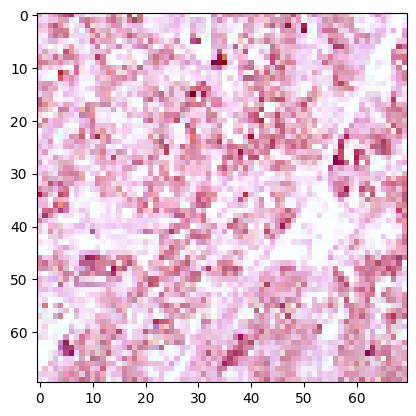

In [13]:
plt.imshow(xtrain[15600])
plt.show()

In [14]:
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32 ,(3,3) , padding = 'same' , input_shape = (70,70,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(1024 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512 , activation='relu' ))
model.add(layers.Dense(5, activation='sigmoid') )

2023-01-15 14:54:24.730894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 14:54:24.784571: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/samantha/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-15 14:54:24.784599: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-01-15 14:54:24.785046: I tensorflow/core/platfo

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 activation (Activation)     (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 35, 35, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                    

In [17]:
sgd = tf.keras.optimizers.SGD(0.01)
model.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [18]:
model.fit(xtrain,ytrain,
         epochs=20,
         validation_data=(xtest,ytest))

Epoch 1/20


2023-01-15 14:54:25.736974: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1102500000 exceeds 10% of free system memory.


586/586 [==============================] - ETA: 0s - loss: 1.3231 - accuracy: 0.3795

2023-01-15 14:57:22.349852: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 367500000 exceeds 10% of free system memory.


586/586 [==============================] - 182s 309ms/step - loss: 1.3231 - accuracy: 0.3795 - val_loss: 1.0942 - val_accuracy: 0.4152
Epoch 2/20
586/586 [==============================] - 181s 309ms/step - loss: 0.8748 - accuracy: 0.6056 - val_loss: 1.2064 - val_accuracy: 0.3938
Epoch 3/20
586/586 [==============================] - 199s 340ms/step - loss: 0.6664 - accuracy: 0.7094 - val_loss: 0.4834 - val_accuracy: 0.8024
Epoch 4/20
586/586 [==============================] - 182s 310ms/step - loss: 0.5385 - accuracy: 0.7634 - val_loss: 0.5628 - val_accuracy: 0.7267
Epoch 5/20
586/586 [==============================] - 181s 309ms/step - loss: 0.4876 - accuracy: 0.7897 - val_loss: 0.6479 - val_accuracy: 0.7227
Epoch 6/20
586/586 [==============================] - 181s 308ms/step - loss: 0.4058 - accuracy: 0.8281 - val_loss: 0.3521 - val_accuracy: 0.8574
Epoch 7/20
586/586 [==============================] - 182s 310ms/step - loss: 0.3746 - accuracy: 0.8503 - val_loss: 0.2751 - val_accura

In [19]:
model.evaluate(xtrain,ytrain)

  1/586 [..............................] - ETA: 28s - loss: 0.0770 - accuracy: 0.9375

2023-01-15 15:58:07.955136: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1102500000 exceeds 10% of free system memory.


586/586 [==============================] - 16s 28ms/step - loss: 0.1371 - accuracy: 0.9433


[0.13713835179805756, 0.9433066844940186]

In [20]:
model.evaluate(xtest,ytest)

  5/196 [..............................] - ETA: 5s - loss: 0.1668 - accuracy: 0.9375

2023-01-15 15:59:26.549050: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 367500000 exceeds 10% of free system memory.


196/196 [==============================] - 5s 28ms/step - loss: 0.1525 - accuracy: 0.9358


[0.15245670080184937, 0.9358400106430054]

In [21]:
ytrainR = [np.argmax(val) for val in ytrain]
ytrainP = [np.argmax(val) for val in model.predict(xtrain)]

2023-01-15 15:59:48.120100: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1102500000 exceeds 10% of free system memory.


586/586 [==============================] - 17s 28ms/step


In [22]:
ytestR = [np.argmax(val) for val in ytest]
ytestP = [np.argmax(val) for val in model.predict(xtest)]

196/196 [==============================] - 5s 28ms/step


In [24]:
confusion_matrix(ytrainR,ytrainP)

array([[3239,  489,    0,    0,    0],
       [ 104, 3558,   26,    7,   15],
       [   0,    8, 3781,    0,    0],
       [   0,    0,    0, 3755,    2],
       [   0,    0,    1,  411, 3354]])

In [25]:
confusion_matrix(ytestR,ytestP)

array([[1075,  197,    0,    0,    0],
       [  33, 1239,   11,    3,    4],
       [   0,    0, 1211,    0,    0],
       [   0,    0,    0, 1237,    6],
       [   0,    0,    1,  146, 1087]])

In [26]:
cancer_cells = ['lung_aca' , 'lung_scc' , 'lung_n' , 'colon_aca' , 'colon_n']

In [27]:
model.predict(xtest[689].reshape(1,70,70,3))

1/1 [==============================] - 0s 77ms/step


array([[0.008031  , 0.03479657, 0.00237884, 0.99996156, 0.97296643]],
      dtype=float32)

1/1 [==============================] - 0s 27ms/step
Predicted Value- lung_n
Real Value- lung_n


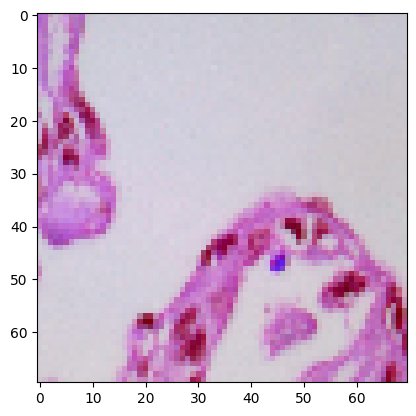

In [32]:
print('Predicted Value-' , cancer_cells[np.argmax(model.predict(xtest[56].reshape(1,70,70,3)))])
print('Real Value-' , cancer_cells[np.argmax(ytest[56])])

plt.imshow(xtest[56])
plt.show()

In [29]:
model.save('lung_coln.h5')